# Predict the grade of a student based on the study hours.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

## Read the data

In [2]:
# Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('score_updated.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Generate statistics of the dataset
data.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [5]:
# Prepare the data
X = data.drop(columns=['Scores'], axis=1)  # X contains the feature columns, excluding 'Scores'
y = data.drop(columns=['Hours'], axis=1)   # y contains the target variable 'Scores', excluding 'Hours'

Text(0.5, 1.0, 'Plot of Number of Study Hours vs. Marks of the Student')

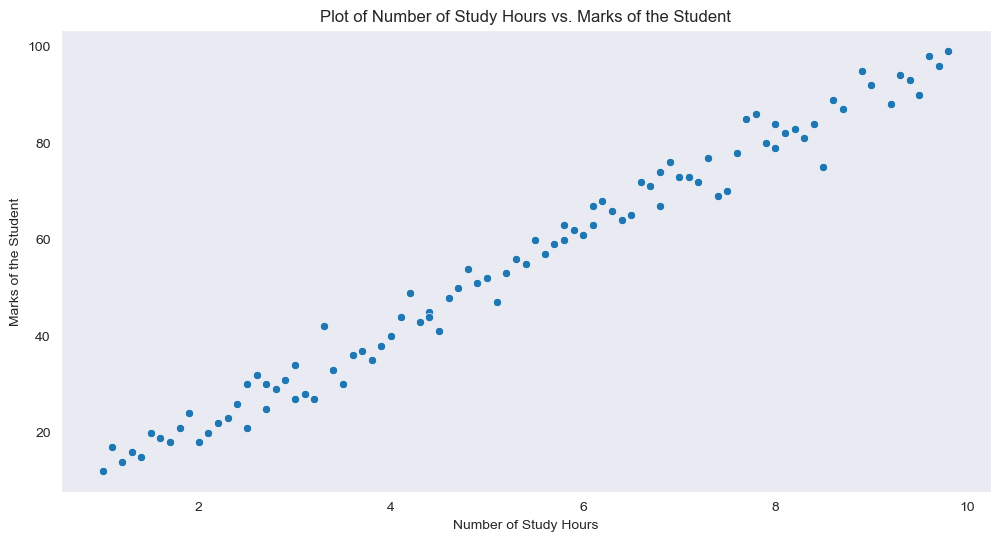

In [6]:
# Create a scatterplot to visualize the relationship between study hours and student marks
plt.figure(figsize=(12, 6))                 # Set the figure size
sns.set_style("dark")                       # Set the plot style using Seaborn
sns.scatterplot(x=data['Hours'], y=data['Scores'])  # Create the scatterplot
plt.xlabel("Number of Study Hours")         # Set the x-axis label
plt.ylabel("Marks of the Student")          # Set the y-axis label
plt.title("Plot of Number of Study Hours vs. Marks of the Student")  # Set the title

# Splitting the data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [8]:
# Create a Linear Regression model and train it with the training data
model = LinearRegression()  # Initialize a Linear Regression model
model.fit(X_train, y_train)  # Train the model using the training data

LinearRegression()

In [9]:
# Print the coefficients and intercept of the trained Linear Regression model
print("Coefficient of the model: ", model.coef_)  # Print the coefficients (slopes) of the model
print("Intercept of the model: ", model.intercept_)  # Print the intercept of the model

Coefficient of the model:  [[9.83563508]]
Intercept of the model:  [2.44056559]


In [10]:
# Use the trained Linear Regression model to make predictions on the training data
y_pred = model.predict(X_train)

Text(0.5, 1.0, 'Plot of Number of Study Hours vs. Marks of the Student')

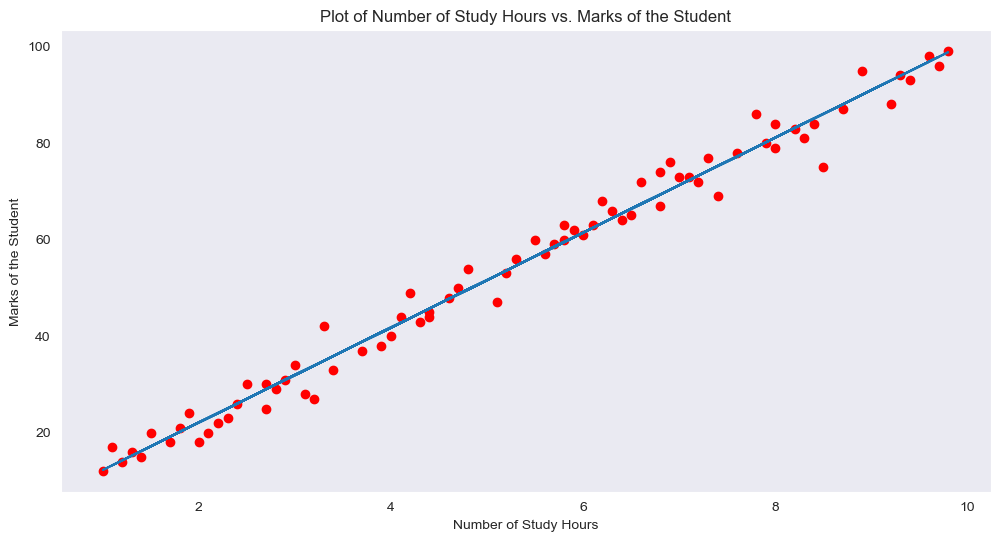

In [11]:
# Create a scatterplot of the training data points and the regression line
plt.figure(figsize=(12, 6))             # Set the figure size
sns.set_style("dark")                   # Set the plot style using Seaborn
plt.scatter(X_train, y_train, color='red')  # Plot the training data points in red
plt.plot(X_train, y_pred)               # Plot the regression line using the model's predictions
plt.xlabel("Number of Study Hours")     # Set the x-axis label
plt.ylabel("Marks of the Student")      # Set the y-axis label
plt.title("Plot of Number of Study Hours vs. Marks of the Student")  # Set the title

# Evaluation

In [12]:
# Use the trained Linear Regression model to make predictions on the test data
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Marks')

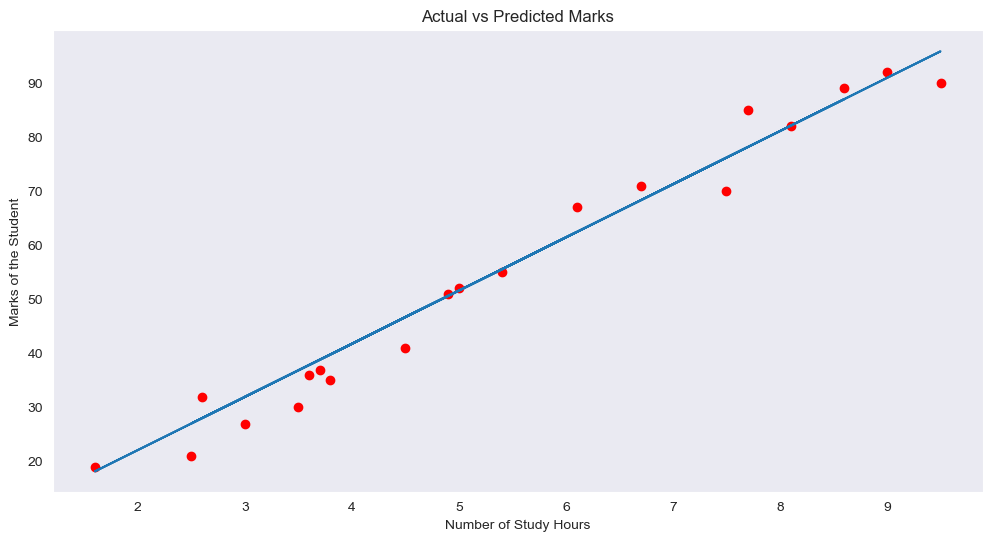

In [13]:
# Create a scatterplot of the test data points and the regression line
plt.figure(figsize=(12, 6))             # Set the figure size
sns.set_style("dark")                   # Set the plot style using Seaborn
plt.scatter(X_test, y_test, color='red')  # Plot the test data points in red
plt.plot(X_test, y_pred)                # Plot the regression line using the model's predictions
plt.xlabel("Number of Study Hours")     # Set the x-axis label
plt.ylabel("Marks of the Student")      # Set the y-axis label
plt.title("Actual vs Predicted Marks")  # Set the title

In [14]:
# Calculate and print evaluation metrics for the model's performance on the test data
acc = model.score(X_test, y_test)           # Calculate the accuracy
mae = mean_absolute_error(y_test, y_pred)   # Calculate the Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)    # Calculate the Mean Squared Error
rmse = np.sqrt(mse)                         # Calculate the Root Mean Squared Error
r2 = r2_score(y_test, y_pred)               # Calculate the R-squared score

In [15]:
# Print the evaluation metrics
print("Accuracy: ", round(acc * 100, 2))    # Print accuracy as a percentage
print("MAE:      ", round(mae, 2))          # Print Mean Absolute Error
print("MSE:      ", round(mse, 2))          # Print Mean Squared Error
print("RMSE:     ", round(rmse, 2))         # Print Root Mean Squared Error
print("R2 score: ", round(r2, 2))           # Print R-squared score

Accuracy:  97.09
MAE:       3.37
MSE:       17.01
RMSE:      4.12
R2 score:  0.97


# Prediction

In [16]:
predicted_marks = model.predict([[9]])
print("Marks of a student who studied 9 hours a day: ", predicted_marks)


Marks of a student who studied 9 hours a day:  [[90.96128129]]


c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
